# Описание задачи
Отечественный дилер планирует открыть салон на территории России. Необходимо выполнить анализ состояния дилерских сетей в стране. Главным параметром является население. Цель - выбрать город для открытия салона.

Для решения задачи предлагается собрать данные с сайта bezrulya.ru. Предполагается автоматический сбор при помощи скрапера (на Python). Атрибуты для извлечения: **наименование** **дилера, город, телефон, адрес, сайт**.

In [ ]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

res = requests.get('https://bezrulya.ru/dealers/')
res

<Response [200]>

In [ ]:
soup = BeautifulSoup(res.text)

In [ ]:
# Задаем URL-адрес сайта для сбора данных
url = 'https://bezrulya.ru/dealers/list/lada/'

# Отправляем GET-запрос к сайту
response = requests.get(url)

# Проверяем успешность запроса
if response.status_code == 200:
    # Создаем объект BeautifulSoup для парсинга страницы
    soup = BeautifulSoup(response.text, 'html.parser')

    # Находим все элементы dl-column
    dlc_items = soup.find_all('div', class_='dlc-item')

    salons = []
    # Цикл для извлечения информации о каждом салоне
    for dlc_item in dlc_items:
      if len(dlc_item.find_all('p')) >= 2:
        name_elem = dlc_item.find('a')
        name = name_elem.text.strip() if name_elem else ""

        p_elements = dlc_item.find_all('p')

        phone = p_elements[1].text.strip()

        address_elem = dlc_item.find('p')
        address = p_elements[2].text.strip() if address_elem else ""

      # Извлекаем город из адреса
        city = address.split(',')[0].strip()
        salon_info = {
         'Название': name,
         'Телефон': phone,
         'Адрес': address,
         'Город' : city
      }
        salons.append(salon_info)

# Выводим датафрейм
print(salons)


[{'Название': 'Лада-Азия', 'Телефон': '+7 (3902) 21-57-33', 'Адрес': 'Абакан, Тепличный, ул. Ленина д.1/1, литер В1', 'Город': 'Абакан'}, {'Название': 'Алтай-Лада (филиал СТО г.Алейск)', 'Телефон': '(38553) 22-361', 'Адрес': 'Алейск, ул. Прудская, 41', 'Город': 'Алейск'}, {'Название': 'АВТОСОЮЗ', 'Телефон': '+7 (8553) 30-51-11', 'Адрес': 'Альметьевск, ул. Советская, д. 182 А', 'Город': 'Альметьевск'}, {'Название': 'Анапа-Кубань-Лада', 'Телефон': '(86133) 4-68-94', 'Адрес': 'Анапа, 353410, ул. Парковая, 62', 'Город': 'Анапа'}, {'Название': 'Апшеронск-Лада', 'Телефон': '(86152) 2-36-41', 'Адрес': 'Апшеронск, 352650, ул. Свердлова, 144', 'Город': 'Апшеронск'}, {'Название': 'ТЕРЕК-АВТО', 'Телефон': '+7 (8712) 29-12-12', 'Адрес': 'Аргун, ул. Кадырова, д. 117', 'Город': 'Аргун'}, {'Название': 'ТСС-Арзамас', 'Телефон': '+7 (83147) 255-99', 'Адрес': 'Арзамас, Ленина, 110д', 'Город': 'Арзамас'}, {'Название': 'Армавирский Автоцентр Плюс', 'Телефон': '+7 (86137) 22-224', 'Адрес': 'Армавир, ул. Еф

In [ ]:
# Создаем DataFrame из данных
df = pd.DataFrame(salons, columns=['Название','Телефон', 'Адрес', 'Город'])
df.head()

,Название,Телефон,Адрес,Город
0,Лада-Азия,+7 (3902) 21-57-33,"Абакан, Тепличный, ул. Ленина д.1/1, литер В1",Абакан
1,Алтай-Лада (филиал СТО г.Алейск),(38553) 22-361,"Алейск, ул. Прудская, 41",Алейск
2,АВТОСОЮЗ,+7 (8553) 30-51-11,"Альметьевск, ул. Советская, д. 182 А",Альметьевск
3,Анапа-Кубань-Лада,(86133) 4-68-94,"Анапа, 353410, ул. Парковая, 62",Анапа
4,Апшеронск-Лада,(86152) 2-36-41,"Апшеронск, 352650, ул. Свердлова, 144",Апшеронск


In [ ]:
# Сохраняем их в файл
df.to_csv('dealers.csv', index=False)

# Анализ данных

In [ ]:
df.describe()

,Название,Телефон,Адрес,Город
count,381,381,381,381
unique,311,365,381,237
top,Азия Авто,+7 (495) 785-44-71,"Абакан, Тепличный, ул. Ленина д.1/1, литер В1",Москва
freq,10,5,1,13


Всего в данных представлено 381 запись о дилерах: 237 городов, 365 номеров и 381 адрес.

- Большинство записей относится к дилеру с наименованием "Лада-Азия". Это может указывать на то, что "Лада-Азия" имеет множество филиалов или точек продажи.
- Большинство филиалов расположены в Москве.




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Название  381 non-null    object
 1   Телефон   381 non-null    object
 2   Адрес     381 non-null    object
 3   Город     381 non-null    object
dtypes: object(4)
memory usage: 12.0+ KB


###Географическое расположение филиалов и их количество

In [ ]:
city_dealer_count = df['Город'].value_counts()
city_dealer_count

Москва             13
Санкт-Петербург    11
Тольятти            8
Краснодар           7
Саратов             6
                   ..
Красногорск         1
Краснокаменск       1
Красный Яр          1
Кропоткин           1
Яхрома              1
Name: Город, Length: 237, dtype: int64

Топ городов, где расположены филиалы: **Москва, Санкт-Петербург, Тольятти и Краснодар**. Наименьшее количество находится в Краснокаменск, Красный Яр, Кропоткин, Яхрома и тд.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем сводную таблицу с количеством дилеров в каждом городе
city_dealer_count = df['Город'].value_counts().reset_index()
city_dealer_count.columns = ['Город', 'Количество дилеров']
city_dealer_count

,Город,Количество дилеров
0,Москва,13
1,Санкт-Петербург,11
2,Тольятти,8
3,Краснодар,7
4,Саратов,6
...,...,...
232,Красногорск,1
233,Краснокаменск,1
234,Красный Яр,1
235,Кропоткин,1


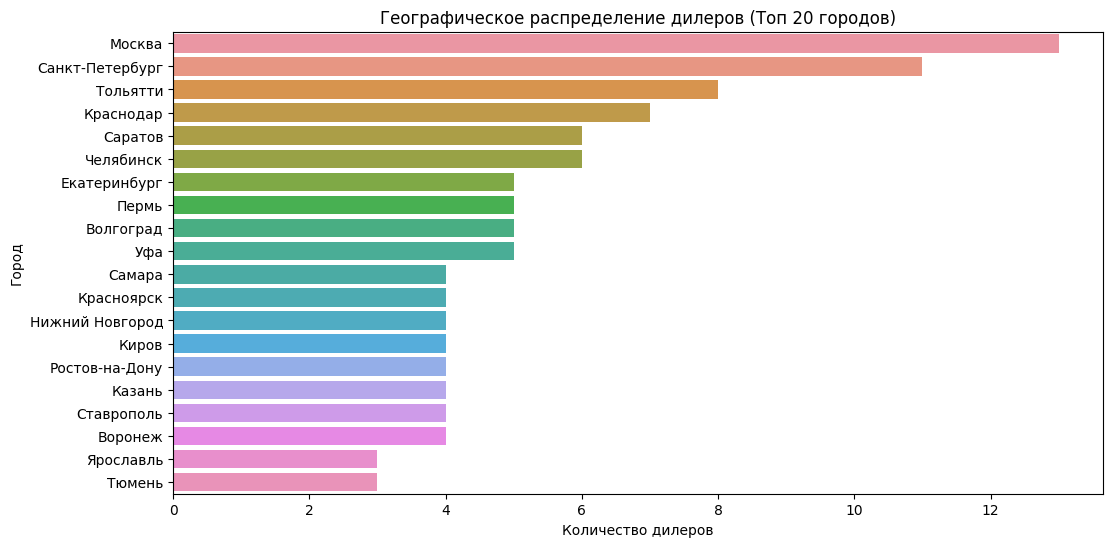

In [ ]:
# Используем Seaborn для создания визуализации
plt.figure(figsize=(12, 6))
sns.barplot(x='Количество дилеров', y='Город', data=city_dealer_count.head(20))
plt.title('Географическое распределение дилеров (Топ 20 городов)')
plt.xlabel('Количество дилеров')
plt.ylabel('Город')
plt.show()

В данном случае, Москва и Санкт-Петербург являются двумя наиболее популярными городами с наибольшим количеством дилеров. Поскольку Москва и Санкт-Петербург уже имеют много дилеров, можно рассмотреть другие города для минимизации конкуренции.

Например, можно рассмотреть города среднего размера, которые имеют относительно высокое население и менее насыщенный рынок дилеров. Можно обратить внимание на города Краснодар и Челябинск, где меньше количество дилеров, но население примерно такое же.

### Количество дилеров и распределение их по городам

In [ ]:
top_dealers = df['Название'].value_counts()
top_dealers

Азия Авто        10
Сокол Моторс      8
П-сервис+         6
ГК АГАТ           5
АвтоГЕРМЕС        5
                 ..
Бугач-Авто        1
Медведь Лада      1
Урал Лада         1
Экспресс-АВТО     1
Яхрома-Лада       1
Name: Название, Length: 311, dtype: int64

ТОП-3 распространенных салона Lada - Азия Авто, Сокол Моторс и П-сервис+.

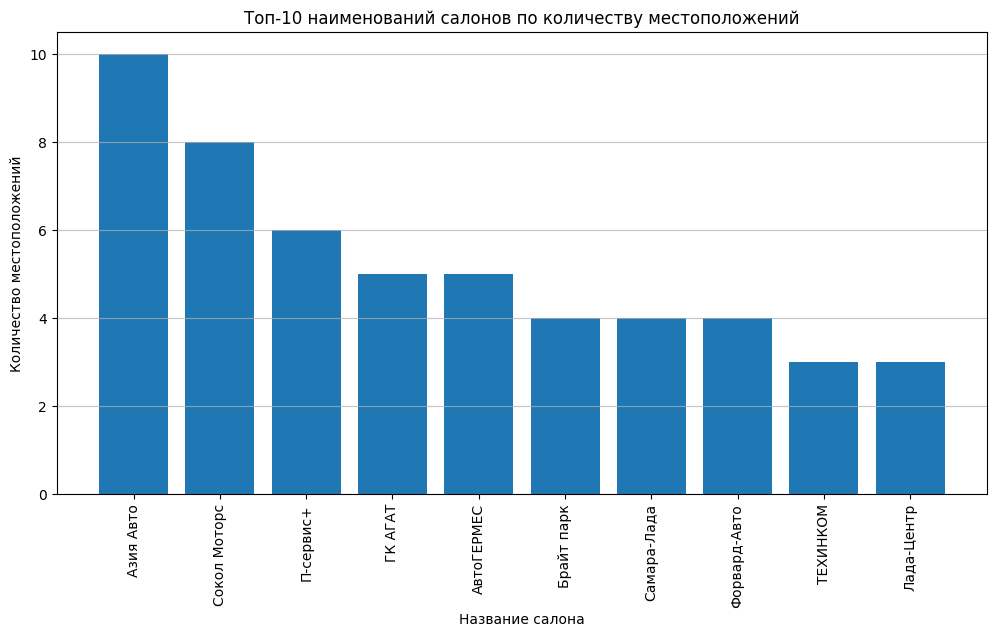

In [ ]:
top_dealers = df['Название'].value_counts().head(10)

# Построение визуализации
plt.figure(figsize=(12, 6))
plt.bar(top_dealers.index, top_dealers.values)
plt.title('Топ-10 наименований салонов по количеству местоположений')
plt.xlabel('Название салона')
plt.ylabel('Количество местоположений')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Итог

Можно рассмотреть следующие варианты:

**Москва**: С учетом ее огромного населения и высокой плотности автотранспорта, Москва может быть привлекательным местом для открытия новой дилерской точки. Однако, конкуренция среди дилеров в Москве высока, и потребуется хорошая маркетинговая стратегия.

**Санкт-Петербург**: Второй по величине город России, также представляет большой рынок для автомобилей. Сеть дилеров развита, но есть место для новых участников, особенно если у вас есть уникальное предложение.

**Региональные города**: Рассмотрите менее крупные региональные города, такие как Челябинск, Екатеринбург и Краснодар. Эти города могут иметь стабильный рынок, а конкуренция среди дилеров может быть менее интенсивной, чем в мегаполисах.

# Добавление исходных данных

In [ ]:
new_df = pd.read_csv('Исходные данные.csv')
new_df.head()

,Id дилера,URL,Город,Марка,Наименование,Телефон,Адрес,Широта,Долгота,Район,Регион
0,3256.0,https://bezrulya.ru/dealers/list/lada/,Абакан,lada,Лада-Азия,+7 (3902) 21-57-33,Абакан Тепличный ул. Ленина д.1/1 литер В1,53.720680,91.440602,городской округ Абакан,Республика Хакасия
1,3257.0,https://bezrulya.ru/dealers/list/lada/,Алейск,lada,Алтай-Лада (филиал СТО г.Алейск),(38553) 22-361,Алейск ул. Прудская 41,52.484158,82.761327,городской округ Алейск,Алтайский край
2,3258.0,https://bezrulya.ru/dealers/list/lada/,Альметьевск,lada,АВТОСОЮЗ,+7 (8553) 30-51-11,Альметьевск ул. Советская д. 182 А,54.900501,52.296378,Альметьевский район,Республика Татарстан
3,3259.0,https://bezrulya.ru/dealers/list/lada/,Анапа,lada,Анапа-Кубань-Лада,(86133) 4-68-94,Анапа 353410 ул. Парковая 62,44.890621,37.336469,городской округ Анапа,Краснодарский край
4,3260.0,https://bezrulya.ru/dealers/list/lada/,Апшеронск,lada,Апшеронск-Лада,(86152) 2-36-41,Апшеронск 352650 ул. Свердлова 144,44.461805,39.741048,Апшеронский район,Краснодарский край


In [ ]:
population_cities = pd.read_csv('Население городов.csv')
population_cities.head()

,Регион,Район,Город,Население
0,Алтайский край,Алтайский район,Алтайское,14235
1,Алтайский край,Баевский район,Баево,4188
2,Алтайский край,Благовещенский район,Благовещенка,11448
3,Алтайский край,Бурлинский район,Бурла,4026
4,Алтайский край,Быстроистокский район,Быстрый Исток,3460


In [ ]:
population_regions = pd.read_csv('Население регионов.csv')
population_regions.head()

,Регион,Население региона
0,Алтайский край,2376774
1,Амурская область,811274
2,Архангельская область,1202295
3,Астраханская область,997778
4,Белгородская область,1547936


In [ ]:
# Объединение таблицы дилеров с таблицей регионов по региону
merged_df = pd.merge(new_df, population_regions, on='Регион', how='left')
merged_df.head()

,Id дилера,URL,Город,Марка,Наименование,Телефон,Адрес,Широта,Долгота,Район,Регион,Население региона
0,3256.0,https://bezrulya.ru/dealers/list/lada/,Абакан,lada,Лада-Азия,+7 (3902) 21-57-33,Абакан Тепличный ул. Ленина д.1/1 литер В1,53.720680,91.440602,городской округ Абакан,Республика Хакасия,532036
1,3257.0,https://bezrulya.ru/dealers/list/lada/,Алейск,lada,Алтай-Лада (филиал СТО г.Алейск),(38553) 22-361,Алейск ул. Прудская 41,52.484158,82.761327,городской округ Алейск,Алтайский край,2376774
2,3258.0,https://bezrulya.ru/dealers/list/lada/,Альметьевск,lada,АВТОСОЮЗ,+7 (8553) 30-51-11,Альметьевск ул. Советская д. 182 А,54.900501,52.296378,Альметьевский район,Республика Татарстан,3894120
3,3259.0,https://bezrulya.ru/dealers/list/lada/,Анапа,lada,Анапа-Кубань-Лада,(86133) 4-68-94,Анапа 353410 ул. Парковая 62,44.890621,37.336469,городской округ Анапа,Краснодарский край,5402609
4,3260.0,https://bezrulya.ru/dealers/list/lada/,Апшеронск,lada,Апшеронск-Лада,(86152) 2-36-41,Апшеронск 352650 ул. Свердлова 144,44.461805,39.741048,Апшеронский район,Краснодарский край,5402609


In [ ]:
# Объединение таблицы дилеров с таблицей городов по городу
final_table = pd.merge(merged_df, population_cities, on='Город', how='left')
final_table.head()

,Id дилера,URL,Город,Марка,Наименование,Телефон,Адрес,Широта,Долгота,Район_x,Регион_x,Население региона,Регион_y,Район_y,Население
0,3256.0,https://bezrulya.ru/dealers/list/lada/,Абакан,lada,Лада-Азия,+7 (3902) 21-57-33,Абакан Тепличный ул. Ленина д.1/1 литер В1,53.720680,91.440602,городской округ Абакан,Республика Хакасия,532036,Республика Хакасия,городской округ Абакан,186201
1,3257.0,https://bezrulya.ru/dealers/list/lada/,Алейск,lada,Алтай-Лада (филиал СТО г.Алейск),(38553) 22-361,Алейск ул. Прудская 41,52.484158,82.761327,городской округ Алейск,Алтайский край,2376774,Алтайский край,городской округ Алейск,29249
2,3258.0,https://bezrulya.ru/dealers/list/lada/,Альметьевск,lada,АВТОСОЮЗ,+7 (8553) 30-51-11,Альметьевск ул. Советская д. 182 А,54.900501,52.296378,Альметьевский район,Республика Татарстан,3894120,Республика Татарстан,Альметьевский район,151157
3,3259.0,https://bezrulya.ru/dealers/list/lada/,Анапа,lada,Анапа-Кубань-Лада,(86133) 4-68-94,Анапа 353410 ул. Парковая 62,44.890621,37.336469,городской округ Анапа,Краснодарский край,5402609,Краснодарский край,городской округ Анапа,73410
4,3260.0,https://bezrulya.ru/dealers/list/lada/,Апшеронск,lada,Апшеронск-Лада,(86152) 2-36-41,Апшеронск 352650 ул. Свердлова 144,44.461805,39.741048,Апшеронский район,Краснодарский край,5402609,Краснодарский край,Апшеронский район,40244


In [ ]:
total_final_table = final_table.drop(['Регион_y', 'Район_y'], axis=1)
total_final_table.head()

,Id дилера,URL,Город,Марка,Наименование,Телефон,Адрес,Широта,Долгота,Район_x,Регион_x,Население региона,Население
0,3256.0,https://bezrulya.ru/dealers/list/lada/,Абакан,lada,Лада-Азия,+7 (3902) 21-57-33,Абакан Тепличный ул. Ленина д.1/1 литер В1,53.720680,91.440602,городской округ Абакан,Республика Хакасия,532036,186201
1,3257.0,https://bezrulya.ru/dealers/list/lada/,Алейск,lada,Алтай-Лада (филиал СТО г.Алейск),(38553) 22-361,Алейск ул. Прудская 41,52.484158,82.761327,городской округ Алейск,Алтайский край,2376774,29249
2,3258.0,https://bezrulya.ru/dealers/list/lada/,Альметьевск,lada,АВТОСОЮЗ,+7 (8553) 30-51-11,Альметьевск ул. Советская д. 182 А,54.900501,52.296378,Альметьевский район,Республика Татарстан,3894120,151157
3,3259.0,https://bezrulya.ru/dealers/list/lada/,Анапа,lada,Анапа-Кубань-Лада,(86133) 4-68-94,Анапа 353410 ул. Парковая 62,44.890621,37.336469,городской округ Анапа,Краснодарский край,5402609,73410
4,3260.0,https://bezrulya.ru/dealers/list/lada/,Апшеронск,lada,Апшеронск-Лада,(86152) 2-36-41,Апшеронск 352650 ул. Свердлова 144,44.461805,39.741048,Апшеронский район,Краснодарский край,5402609,40244


In [ ]:
# Отбираем только дилеров lada
lada = total_final_table.loc[total_final_table['Марка'] == 'lada']
lada

,Id дилера,URL,Город,Марка,Наименование,Телефон,Адрес,Широта,Долгота,Район_x,Регион_x,Население региона,Население
0,3256.0,https://bezrulya.ru/dealers/list/lada/,Абакан,lada,Лада-Азия,+7 (3902) 21-57-33,Абакан Тепличный ул. Ленина д.1/1 литер В1,53.720680,91.440602,городской округ Абакан,Республика Хакасия,532036,186201
1,3257.0,https://bezrulya.ru/dealers/list/lada/,Алейск,lada,Алтай-Лада (филиал СТО г.Алейск),(38553) 22-361,Алейск ул. Прудская 41,52.484158,82.761327,городской округ Алейск,Алтайский край,2376774,29249
2,3258.0,https://bezrulya.ru/dealers/list/lada/,Альметьевск,lada,АВТОСОЮЗ,+7 (8553) 30-51-11,Альметьевск ул. Советская д. 182 А,54.900501,52.296378,Альметьевский район,Республика Татарстан,3894120,151157
3,3259.0,https://bezrulya.ru/dealers/list/lada/,Анапа,lada,Анапа-Кубань-Лада,(86133) 4-68-94,Анапа 353410 ул. Парковая 62,44.890621,37.336469,городской округ Анапа,Краснодарский край,5402609,73410
4,3260.0,https://bezrulya.ru/dealers/list/lada/,Апшеронск,lada,Апшеронск-Лада,(86152) 2-36-41,Апшеронск 352650 ул. Свердлова 144,44.461805,39.741048,Апшеронский район,Краснодарский край,5402609,40244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,NaN,NaN,Белореченский,lada,NaN,NaN,NaN,NaN,NaN,Усольский район,Иркутская область,2417801,7790
2492,NaN,NaN,Усть-Ордынский,lada,NaN,NaN,NaN,NaN,NaN,Эхирит-Булагатский район,Иркутская область,2417801,15278
2493,NaN,NaN,Бодайбо,lada,NaN,NaN,NaN,NaN,NaN,Бодайбинский район,Иркутская область,2417801,13104
2494,NaN,NaN,Жатай,lada,NaN,NaN,NaN,NaN,NaN,городской округ Жатай,Республика Саха (Якутия),954803,10511


In [ ]:
lada_table = lada[['Id дилера','Город', 'Наименование', 'Регион_x', 'Население региона', 'Население']]
lada_table

,Id дилера,Город,Наименование,Регион_x,Население региона,Население
0,3256.0,Абакан,Лада-Азия,Республика Хакасия,532036,186201
1,3257.0,Алейск,Алтай-Лада (филиал СТО г.Алейск),Алтайский край,2376774,29249
2,3258.0,Альметьевск,АВТОСОЮЗ,Республика Татарстан,3894120,151157
3,3259.0,Анапа,Анапа-Кубань-Лада,Краснодарский край,5402609,73410
4,3260.0,Апшеронск,Апшеронск-Лада,Краснодарский край,5402609,40244
...,...,...,...,...,...,...
2491,NaN,Белореченский,NaN,Иркутская область,2417801,7790
2492,NaN,Усть-Ордынский,NaN,Иркутская область,2417801,15278
2493,NaN,Бодайбо,NaN,Иркутская область,2417801,13104
2494,NaN,Жатай,NaN,Республика Саха (Якутия),954803,10511


## Количество городов, где представлены салоны марки lada
Так как в таблице есть NaN значений с помощью функции nunique(), которая считает кол-во уникальных значений, исключая NaN значения, узнаем количество городов, в которых представлена салоны lada.

In [ ]:
filtered_lada_table = lada_table[lada_table['Наименование'].notna()]  # убираем пропуски


count_of_cities_with_salons = filtered_lada_table['Город'].nunique() # считаем уникальные значения

filtered_lada_table.head()

,Id дилера,Город,Наименование,Регион_x,Население региона,Население
0,3256.0,Абакан,Лада-Азия,Республика Хакасия,532036,186201
1,3257.0,Алейск,Алтай-Лада (филиал СТО г.Алейск),Алтайский край,2376774,29249
2,3258.0,Альметьевск,АВТОСОЮЗ,Республика Татарстан,3894120,151157
3,3259.0,Анапа,Анапа-Кубань-Лада,Краснодарский край,5402609,73410
4,3260.0,Апшеронск,Апшеронск-Лада,Краснодарский край,5402609,40244


In [ ]:
count_of_cities_with_salons

237

Салоны Lada представлены в <font color='yellow'>237</font> городах.


Выведем города с количеством дилеров в каждом городе


In [ ]:
# Группировка данных по столбцу 'Город' и подсчет уникальных значений в столбце 'Наименование'
dealer_counts_table = lada_table.groupby('Город')['Наименование'].nunique().reset_index().sort_values(by='Наименование', ascending=False)

# Список городов с количеством дилеров в каждом городе
dealer_counts_table.head()

,Город,Наименование
1768,Тольятти,8
1524,Санкт-Петербург,7
1113,Москва,7
1531,Саратов,6
1963,Челябинск,6


##Численность населения на одного дилера lada в регионе


In [ ]:
def calculate_population_per_dealer(filtered_lada_table):
    # Группируем данные по региону и считаем среднее население региона
    region_population = filtered_lada_table.groupby('Регион_x')['Население региона'].mean()

    # Группируем данные по региону и считаем общее количество дилеров
    dealers_count = filtered_lada_table.groupby('Регион_x')['Наименование'].nunique()


    # Считаем численность населения на одного дилера Lada в регионе
    population_per_dealer = region_population / dealers_count

    return population_per_dealer


result = calculate_population_per_dealer(filtered_lada_table)

print(result)


Регион_x
Алтайский край                              339539.142857
Амурская область                            811274.000000
Архангельская область                       300573.750000
Астраханская область                        249444.500000
Белгородская область                        386984.000000
                                                ...      
Ханты-Мансийский автономный округ - Югра    279112.666667
Челябинская область                         315983.909091
Чеченская Республика                        499330.666667
Чувашская Республика                        413328.000000
Ярославская область                         423890.666667
Length: 75, dtype: float64


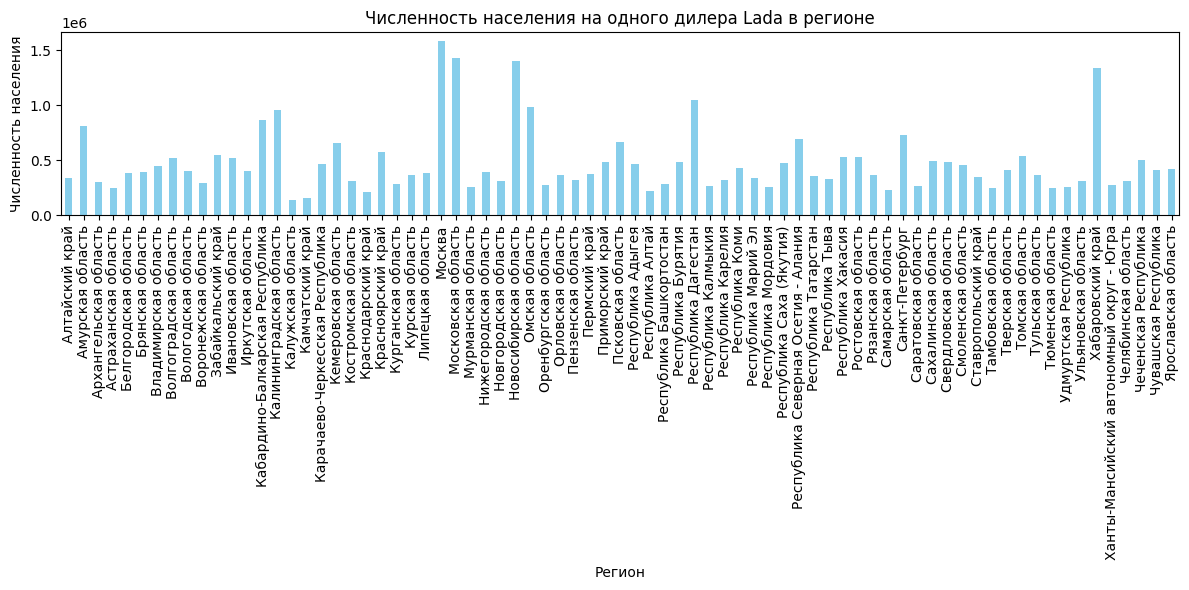

In [ ]:
# Выведем результат в график
plt.figure(figsize=(12, 6))


result.plot(kind='bar', color='skyblue')
plt.title('Численность населения на одного дилера Lada в регионе')
plt.xlabel('Регион')
plt.ylabel('Численность населения')

# Поворачиваем подписи оси x для удобства чтения
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

##Города с населением более 300 тыс. жителей, где дилеры lada не представлены

Фильтруем общий датафрейм, выбирая все марки кроме lada и с населением более 300 тыс. жителей

In [ ]:
no_lada = total_final_table.loc[((total_final_table['Марка'] == 'lada') & (total_final_table['Население'] > 300000) & (total_final_table['Наименование'].isnull()) & (total_final_table['Город'] != 'Орёл'))]
no_lada.head()

,Id дилера,URL,Город,Марка,Наименование,Телефон,Адрес,Широта,Долгота,Район_x,Регион_x,Население региона,Население
598,NaN,NaN,Симферополь,lada,NaN,NaN,NaN,NaN,NaN,городской округ Симферополь,Республика Крым,1901578,341799
2495,NaN,NaN,Севастополь,lada,NaN,NaN,NaN,NaN,NaN,Севастополь,Севастополь,509992,509992


Выводим список

In [ ]:
cities = pd.unique(no_lada[['Город']].values.ravel())
cities

array(['Симферополь', 'Севастополь'], dtype=object)